<a href="https://colab.research.google.com/github/elmarsmn/Student_Performance/blob/main/student_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv("/content/Student_performance_data _.csv")

In [ ]:
df

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [ ]:
df = df.drop(["StudentID","Ethnicity"], axis = 1)

In [ ]:
X = df.drop("GradeClass",axis = 1)
y = df["GradeClass"].copy()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)


In [ ]:
df.isna().sum()

,0
Age,0
Gender,0
ParentalEducation,0
StudyTimeWeekly,0
Absences,0
Tutoring,0
ParentalSupport,0
Extracurricular,0
Sports,0
Music,0


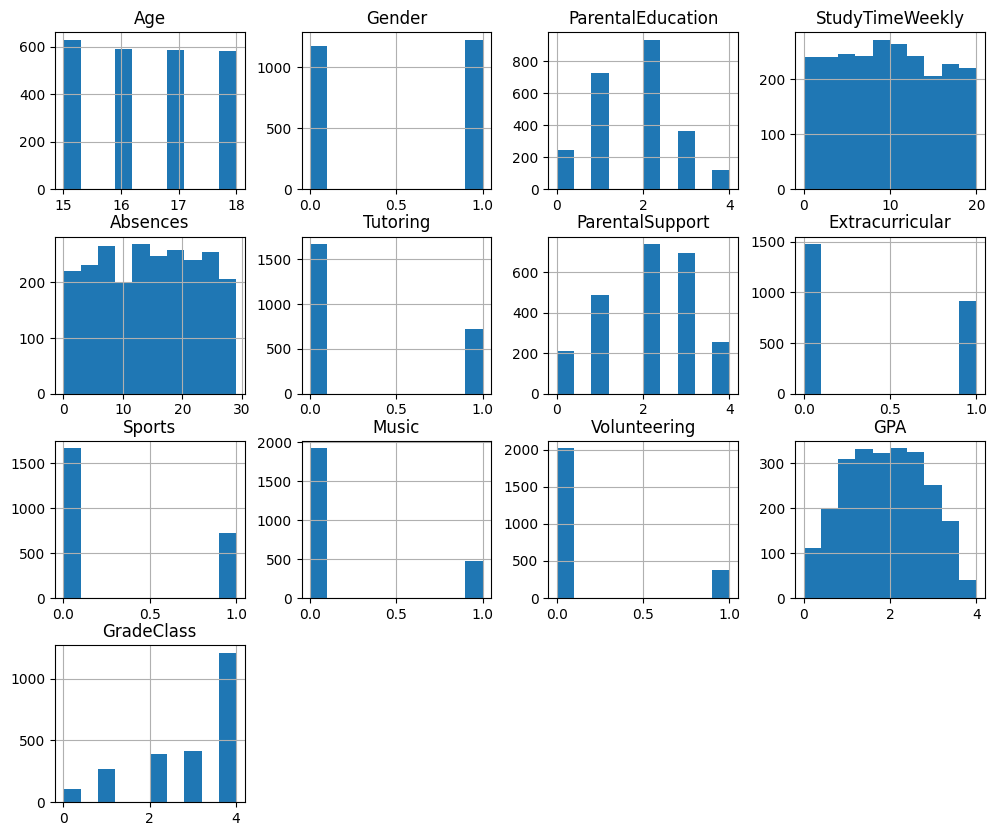

In [ ]:
df.hist(figsize = (12,10));

In [ ]:
df.describe()

,Age,Gender,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,16.468645,0.510870,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,1.123798,0.499986,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,15.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,16.000000,1.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,17.000000,1.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,18.000000,1.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_reg1 = LogisticRegression()
log_reg1.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
log_reg1.score(X_test,y_test)

0.7870563674321504

In [ ]:
n_labeled = 50
log_reg = LogisticRegression(max_iter = 10000)
log_reg.fit(X_train[:n_labeled],y_train[:n_labeled])

LogisticRegression(max_iter=10000)

In [ ]:
log_reg.score(X_test,y_test)

0.6263048016701461

In [ ]:
y_train

,GradeClass
577,4.0
687,2.0
42,2.0
133,3.0
2111,3.0
1046,4.0
961,0.0
1659,4.0
1966,2.0
533,4.0


In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [ ]:
k = 50
kmeans = KMeans(n_clusters = k,n_init=10,random_state=42)
X_digits_dist  = kmeans.fit_transform(X_train)
representative_digit_idx = X_digits_dist.argmin(axis=0)

In [ ]:
representative_digit_idx

array([1357,  539,  450,  154,  576,  753,  370,  375, 1397,   11,   77,
       1824, 1192,  839, 1057, 1484, 1850,  898, 1395, 1587, 1724, 1248,
       1206, 1105,  535,  306, 1477, 1661, 1509, 1386,  277,  217,  343,
        181,  501,  119,  250,  405, 1304,  489, 1109,  604,  299,  643,
        347,  454, 1593, 1116,  158, 1329])

In [ ]:
y_train.iloc[representative_digit_idx]

,GradeClass
2134,4.0
410,3.0
933,3.0
843,1.0
1653,4.0
749,2.0
370,4.0
172,3.0
169,4.0
1217,2.0


In [ ]:
X_representative_digits = X_train.iloc[representative_digit_idx]

In [ ]:
y_representative_digits = y_train.iloc[representative_digit_idx]

In [ ]:
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_representative_digits,y_representative_digits)
log_reg.score(X_test,y_test)

0.5636743215031316

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_10 = pca.fit_transform(X_representative_digits)

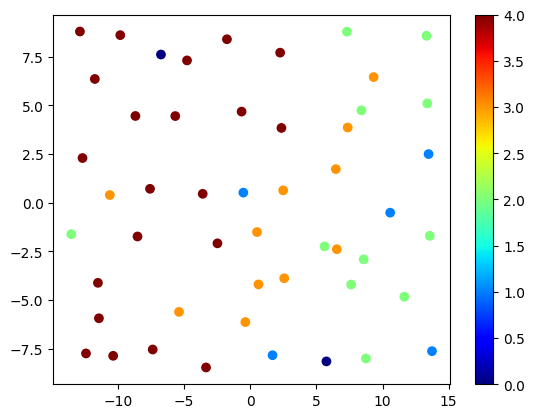

In [ ]:
plt.scatter(X_train_10[:,0],X_train_10[:,1],c = y_representative_digits,cmap = "jet")
plt.colorbar()

In [ ]:
np.random.seed(42)

In [ ]:
#label Propagation

In [ ]:
y_train_propagated  = np.empty(len(X_train))
for i in range(k):
  y_train_propagated[kmeans.labels_ == i] = y_representative_digits.iloc[i]

In [ ]:
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train,y_train_propagated)

LogisticRegression(max_iter=10000)

In [ ]:
log_reg.score(X_test,y_test)

0.6242171189979123

In [ ]:
#keeping <99%
percentile_closest = 99

X_cluster_dist = X_digits_dist[np.arange(len(X_train)),kmeans.labels_]
for i in range(k):
  in_cluster = (kmeans.labels_ == i)
  cluster_dist = X_cluster_dist[in_cluster]
  cutoff_distance = np.percentile(cluster_dist,percentile_closest)
  above_cutoff = (X_cluster_dist > cutoff_distance)
  X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [ ]:
log_reg2 = LogisticRegression(max_iter=10000)

In [ ]:
log_reg2.fit(X_train_partially_propagated,y_train_partially_propagated)
log_reg2.score(X_test,y_test)

0.6242171189979123